<a href="https://colab.research.google.com/github/styopochkin23/data-analytics-portfolio/blob/main/Portfolio_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1️⃣ ПІДКЛЮЧАЄМО GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [70]:
# 2️⃣ ЗАВАНТАЖУЄМО CSV З GOOGLE DRIVE
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway


file_path = "/content/drive/MyDrive/projects/Final Project/PortfolioProject1.csv"
df = pd.read_csv(file_path)

df.head()


,order_date,ga_session_id,continent,country,device,browser,mobile_model_name,operating_system,language,medium,channel,account_id,is_verified,is_unsubscribed,category,product_name,price,short_description
0,2020-11-01,5760483956,Americas,United States,desktop,Chrome,Safari,Macintosh,zh,<Other>,Paid Search,NaN,NaN,NaN,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
1,2020-11-01,7115337200,Europe,United Kingdom,desktop,Chrome,Chrome,Web,en-us,organic,Organic Search,NaN,NaN,NaN,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
2,2020-11-01,3978035233,Europe,Norway,mobile,Chrome,<Other>,Web,zh,(none),Direct,NaN,NaN,NaN,Tables & desks,RÅSKOG,189.0,"Trolley, 35x45x78 cm"
3,2020-11-01,9648986282,Africa,Nigeria,mobile,Chrome,<Other>,Android,es-es,(none),Direct,NaN,NaN,NaN,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
4,2020-11-01,4393441533,Asia,China,desktop,Chrome,Chrome,Windows,en-us,(none),Direct,NaN,NaN,NaN,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349545 entries, 0 to 349544
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_date         349545 non-null  object 
 1   ga_session_id      349545 non-null  int64  
 2   continent          349545 non-null  object 
 3   country            349545 non-null  object 
 4   device             349545 non-null  object 
 5   browser            349545 non-null  object 
 6   mobile_model_name  349545 non-null  object 
 7   operating_system   349545 non-null  object 
 8   language           235279 non-null  object 
 9   medium             349545 non-null  object 
 10  channel            349545 non-null  object 
 11  account_id         27945 non-null   float64
 12  is_verified        27945 non-null   float64
 13  is_unsubscribed    27945 non-null   float64
 14  category           33538 non-null   object 
 15  product_name       33538 non-null   object 
 16  pr

In [4]:
df.shape


(349545, 18)

In [5]:
df.describe()


,ga_session_id,account_id,is_verified,is_unsubscribed,price
count,3.495450e+05,27945.000000,27945.000000,27945.000000,33538.000000
mean,4.992250e+09,659005.065557,0.716980,0.169440,953.298679
std,2.887451e+09,13216.529465,0.450474,0.375147,1317.001775
min,1.205000e+03,636133.000000,0.000000,0.000000,3.000000
25%,2.493647e+09,647576.000000,0.000000,0.000000,170.000000
50%,4.988476e+09,658952.000000,1.000000,0.000000,445.000000
75%,7.491287e+09,670414.000000,1.000000,0.000000,1195.000000
max,9.999997e+09,681962.000000,1.000000,1.000000,9585.000000


In [6]:
df.isna().sum().sort_values(ascending=False)


,0
is_unsubscribed,321600
is_verified,321600
account_id,321600
short_description,316007
product_name,316007
category,316007
price,316007
language,114266
ga_session_id,0
order_date,0


In [7]:
df.nunique()


,0
order_date,92
ga_session_id,349545
continent,6
country,108
device,3
browser,6
mobile_model_name,10
operating_system,6
language,9
medium,6


In [8]:
numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns
datetime_cols = df.select_dtypes(include='datetime').columns

print("Числові колонки:", len(numeric_cols), list(numeric_cols))
print("Категоріальні колонки:", len(categorical_cols), list(categorical_cols))
print("Datetime колонки:", len(datetime_cols), list(datetime_cols))


Числові колонки: 5 ['ga_session_id', 'account_id', 'is_verified', 'is_unsubscribed', 'price']
Категоріальні колонки: 13 ['order_date', 'continent', 'country', 'device', 'browser', 'mobile_model_name', 'operating_system', 'language', 'medium', 'channel', 'category', 'product_name', 'short_description']
Datetime колонки: 0 []


In [9]:
df['ga_session_id'].nunique()


349545

In [10]:
df['order_date'].min(), df['order_date'].max()


('2020-11-01', '2021-01-31')

#Опис датасету

##Загальна кількість рядків:
349 545

##Загальна кількість колонок:
18

##Числові колонки (5):

* ga_session_id (int64)

* account_id (float64)

* is_verified (float64)

* is_unsubscribed (float64)

* price (float64)

##Категоріальні колонки (13):

* order_date

* continent

* country

* device

* browser

* mobile_model_name

* operating_system

* language

* medium

* channel

* category

* product_name

* short_description

##Колонки типу datetime:

* order_date (поки тип object, потрібно конвертувати в datetime)

##Кількість унікальних сесій:
* 349 545

##Період даних:

від: 2020-11-01

до: 2021-01-31

##Пропущені значення:

###Найбільше пропусків у колонках:

* is_unsubscribed – 321 600

* is_verified – 321 600

* account_id – 321 600

* short_description – 316 007

* product_name – 316 007

* category – 316 007

* price – 316 007

* language – 114 266

Це пояснюється тим, що:

* більшість сесій без авторизації

* не всі сесії пов’язані з покупками

* не всі користувачі мають мову браузера

In [11]:
df['order_date'] = pd.to_datetime(df['order_date'])


In [12]:
# Загальні продажі по континентах
sales_by_continent = (
    df.groupby('continent')['price']
    .sum()
    .sort_values(ascending=False)
)

sales_by_continent.head(3)


,price
continent,
Americas,17665280.0
Asia,7601298.3
Europe,5934624.2


In [13]:
# Загальні продажі по країнах
sales_by_country = (
    df.groupby('country')['price']
    .sum()
    .sort_values(ascending=False)
)

sales_by_country.head(5)


,price
country,
United States,13943553.9
India,2809762.0
Canada,2437921.0
United Kingdom,938317.9
France,710692.8


In [14]:
# ТОП-10 категорій товарів за загальною сумою продажів
top_categories = (
    df.groupby('category')['price']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_categories


,price
category,
Sofas & armchairs,8388254.5
Chairs,6147748.8
Beds,4919725.0
Bookcases & shelving units,3640818.1
Cabinets & cupboards,2336499.5
Outdoor furniture,2142222.2
Tables & desks,1790307.5
Chests of drawers & drawer units,906562.5
Bar furniture,735503.0


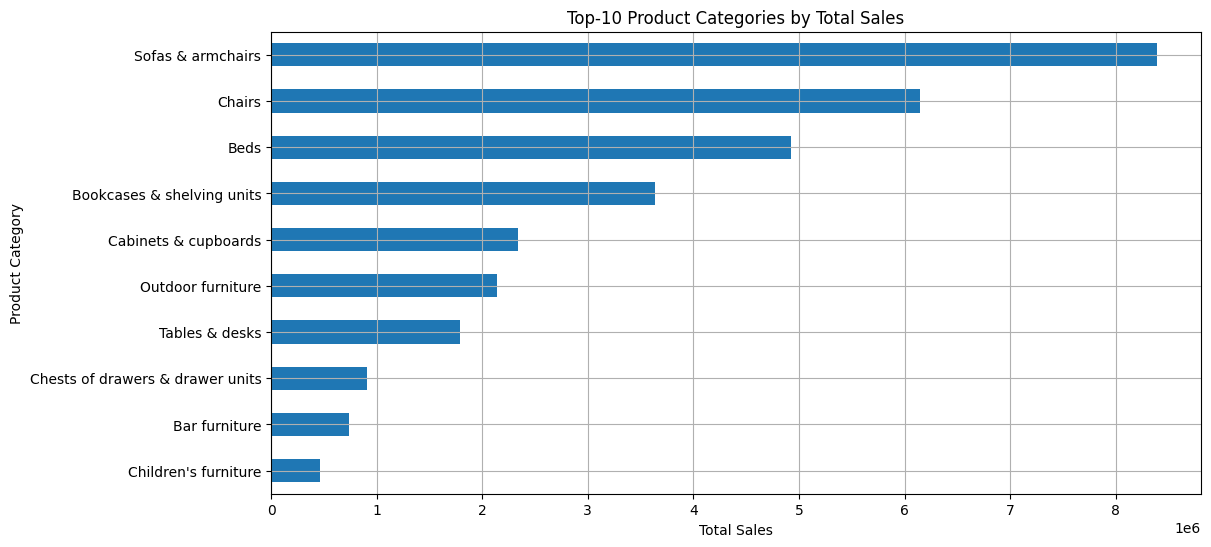

In [15]:
plt.figure(figsize=(12, 6))

top_categories.sort_values().plot(kind='barh')

plt.title('Top-10 Product Categories by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')

plt.grid(True)
plt.show()

Найбільший обсяг продажів припадає на категорію (Sofas & armchairs).
Топ-10 категорій формують основну частину доходу компанії, що свідчить про високу концентрацію продажів у обмеженій кількості товарних напрямів.

In [16]:
df_usa = df[df['country'] == 'United States']


In [17]:
top_categories_usa = (
    df_usa.groupby('category')['price']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_categories_usa


,price
category,
Sofas & armchairs,3707144.5
Chairs,2619773.8
Beds,2213058.0
Bookcases & shelving units,1567606.9
Cabinets & cupboards,994545.5
Outdoor furniture,929245.2
Tables & desks,777865.0
Chests of drawers & drawer units,382388.0
Bar furniture,330805.0


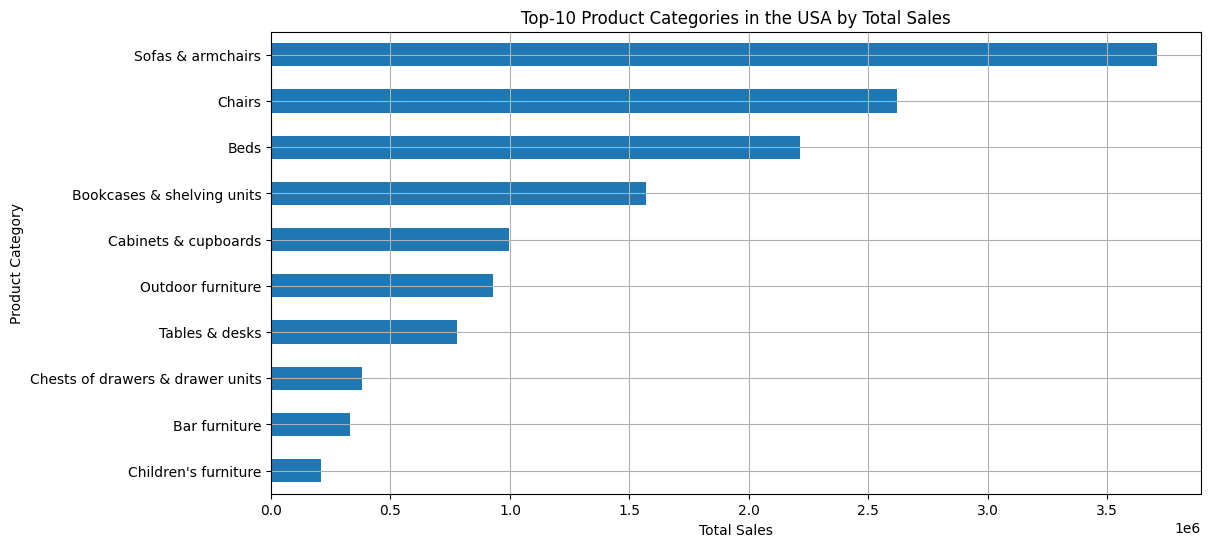

In [18]:
plt.figure(figsize=(12, 6))

top_categories_usa.sort_values().plot(kind='barh')

plt.title('Top-10 Product Categories in the USA by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')

plt.grid(True)
plt.show()


In [19]:
comparison = pd.DataFrame({
    'Global Top Categories': top_categories.head(10),
    'USA Top Categories': top_categories_usa
})

comparison


,Global Top Categories,USA Top Categories
category,,
Sofas & armchairs,8388254.5,3707144.5
Chairs,6147748.8,2619773.8
Beds,4919725.0,2213058.0
Bookcases & shelving units,3640818.1,1567606.9
Cabinets & cupboards,2336499.5,994545.5
Outdoor furniture,2142222.2,929245.2
Tables & desks,1790307.5,777865.0
Chests of drawers & drawer units,906562.5,382388.0
Bar furniture,735503.0,330805.0


Структура топ-категорій у США частково співпадає з глобальним рейтингом, однак спостерігаються і відмінності. Це свідчить про специфіку попиту американського ринку порівняно із загальним розподілом продажів.

In [20]:
sales_by_device = (
    df.groupby('device')['price']
    .sum()
    .sort_values(ascending=False)
)

sales_by_device


,price
device,
desktop,18864039.0
mobile,12384225.8
tablet,723466.3


In [21]:
sales_by_device_percent = (sales_by_device / sales_by_device.sum()) * 100
sales_by_device_percent


,price
device,
desktop,59.002245
mobile,38.734924
tablet,2.262831


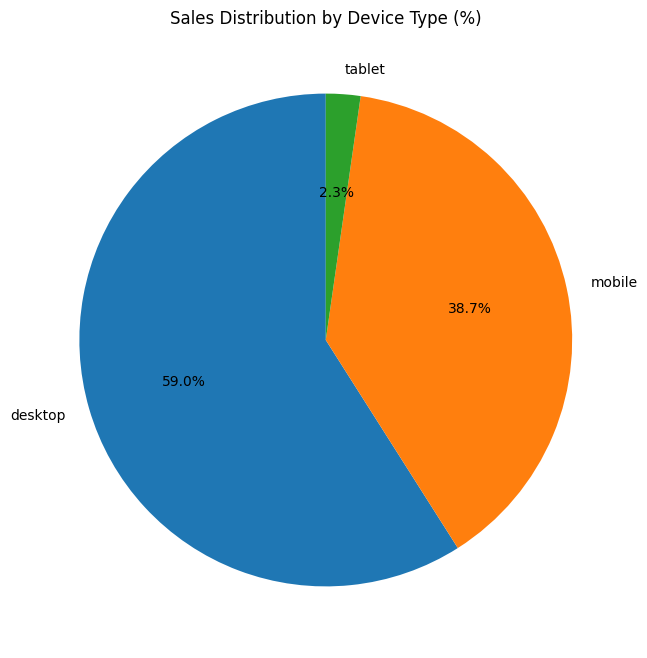

In [22]:
plt.figure(figsize=(8, 8))

sales_by_device_percent.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Sales Distribution by Device Type (%)')
plt.ylabel('')
plt.show()


Продажі розподіляються між девайсами нерівномірно. Основна частка продажів припадає на один домінуючий тип пристрою, що свідчить про ключову роль цього каналу у формуванні виручки. Це має бути враховано при плануванні маркетингових кампаній та UX-стратегії сайту.

In [23]:
# Групуємо всі продажі по колонці "channel" та рахуємо суму price
sales_by_channel = (
    df.groupby('channel')['price']
    .sum()
    .sort_values(ascending=False)
)

# Виводимо результат
sales_by_channel


,price
channel,
Organic Search,11433151.6
Paid Search,8511049.4
Direct,7494923.4
Social Search,2532105.7
Undefined,2000501.0


In [24]:
# Переводимо значення у відсотки від загальної суми
sales_by_channel_percent = (sales_by_channel / sales_by_channel.sum()) * 100

# Виводимо відсотки
sales_by_channel_percent


,price
channel,
Organic Search,35.760189
Paid Search,26.620546
Direct,23.442345
Social Search,7.919827
Undefined,6.257093


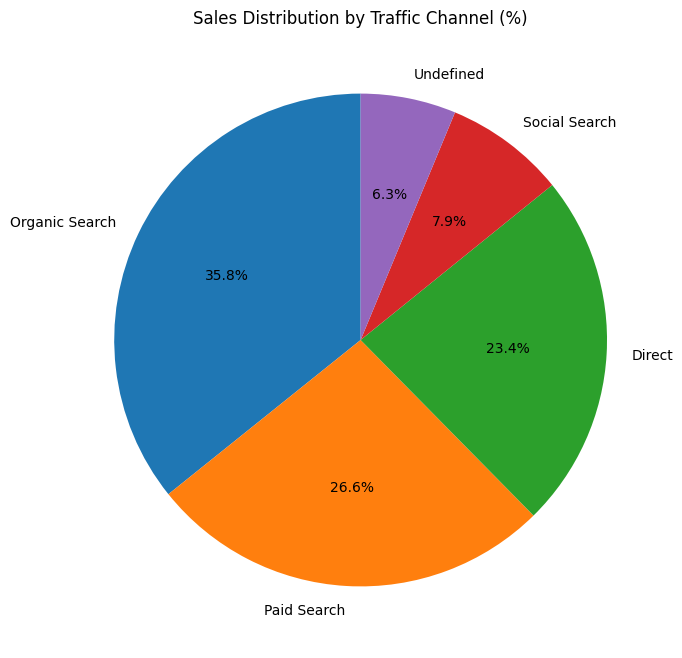

In [25]:
plt.figure(figsize=(8, 8))

# Будуємо pie-chart (кругову діаграму)
sales_by_channel_percent.plot(
    kind='pie',
    autopct='%1.1f%%',   # показуємо відсотки на графіку
    startangle=90       # повертаємо початок діаграми
)

plt.title('Sales Distribution by Traffic Channel (%)')
plt.ylabel('')  # прибираємо технічний підпис осі
plt.show()


Основна частка продажів формується за рахунок одного або двох-трьох основних каналів трафіку. Інші канали мають значно менший внесок у загальну виручку. Це вказує на необхідність концентрації маркетингового бюджету на найбільш ефективних джерелах трафіку.

In [26]:
# Беремо тільки користувачів, які мають account_id (тобто зареєстровані)
registered_users = df[df['account_id'].notna()]

# Дивимось скільки таких користувачів
registered_users.shape


(27945, 18)

In [27]:
# Рахуємо кількість підтверджених email (1 = підтвердив, 0 = ні)
verified_counts = registered_users['is_verified'].value_counts()

# Переводимо у відсотки
verified_percent = verified_counts / verified_counts.sum() * 100

verified_percent


,count
is_verified,
1.0,71.697978
0.0,28.302022


Більшість зареєстрованих користувачів підтвердили свою електронну адресу, що є позитивним сигналом для якості бази користувачів

In [28]:
# Аналізуємо хто відписався
unsubscribe_counts = registered_users['is_unsubscribed'].value_counts()

# Переводимо у відсотки
unsubscribe_percent = unsubscribe_counts / unsubscribe_counts.sum() * 100

unsubscribe_percent


,count
is_unsubscribed,
0.0,83.056003
1.0,16.943997


Частина користувачів відмовилась від email-розсилки, що може свідчити про надмірну частоту листів або низьку релевантність контенту.

In [29]:
# Групуємо продажі по статусу підписки
sales_by_subscription = (
    registered_users
    .groupby('is_unsubscribed')['price']
    .mean()
)

sales_by_subscription


,price
is_unsubscribed,
0.0,921.506812
1.0,965.820134


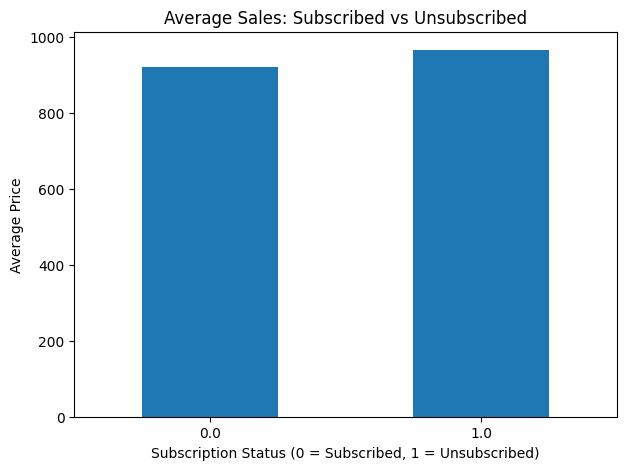

In [30]:
plt.figure(figsize=(7, 5))

sales_by_subscription.plot(kind='bar')

plt.title('Average Sales: Subscribed vs Unsubscribed')
plt.xlabel('Subscription Status (0 = Subscribed, 1 = Unsubscribed)')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()


Користувачі, які залишаються підписаними на email-розсилку, в середньому приносять більше доходу, ніж ті, хто відписався. Це означає, що підписка на розсилку позитивно впливає на залученість та купівельну активність.

In [31]:
# Рахуємо кількість унікальних користувачів по країнах
users_by_country = (
    df[df['account_id'].notna()]
    .groupby('country')['account_id']
    .nunique()
    .sort_values(ascending=False)
)

users_by_country.head(10)


,account_id
country,
United States,12384
India,2687
Canada,2067
United Kingdom,859
France,553
Spain,536
Taiwan,500
China,490
Germany,490


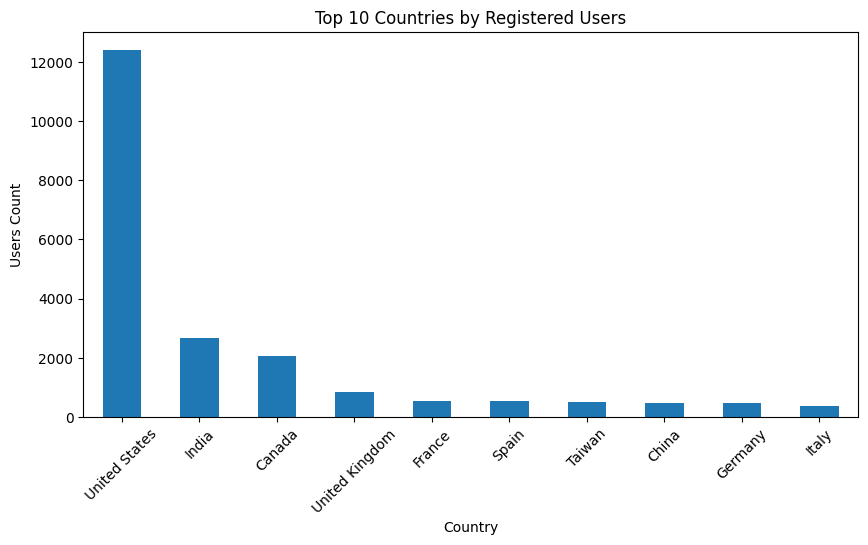

In [32]:
plt.figure(figsize=(10, 5))
users_by_country.head(10).plot(kind='bar')

plt.title('Top 10 Countries by Registered Users')
plt.xlabel('Country')
plt.ylabel('Users Count')
plt.xticks(rotation=45)
plt.show()


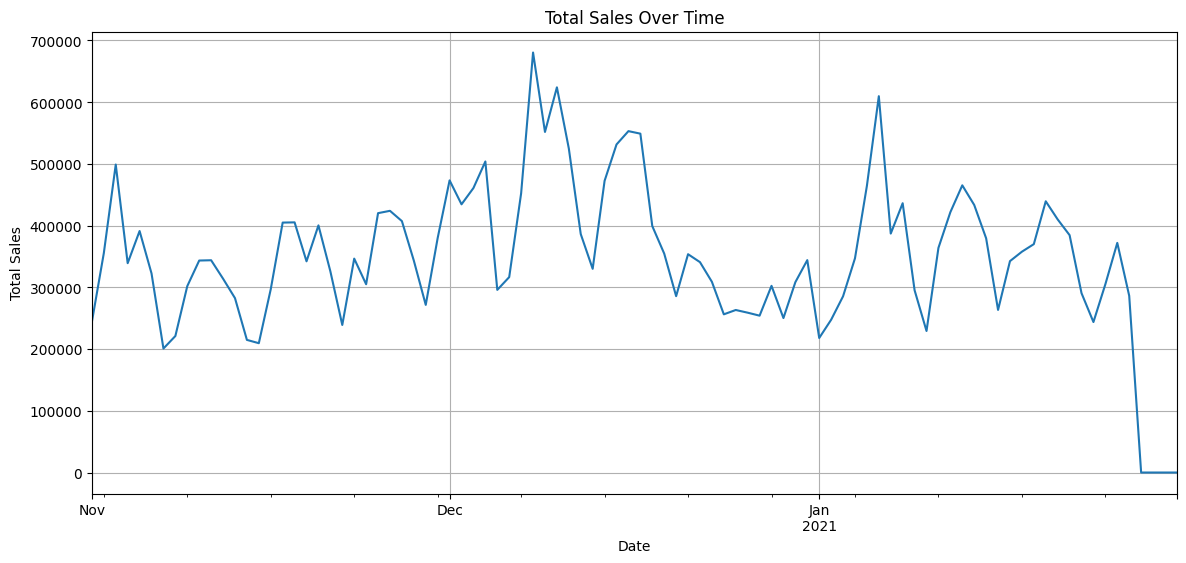

In [34]:
# Групуємо всі продажі по даті та рахуємо загальну суму продажів за кожен день
daily_sales = df.groupby('order_date')['price'].sum()

# Будуємо лінійний графік
plt.figure(figsize=(14, 6))
daily_sales.plot()

plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


Продажі змінюються нерівномірно протягом часу. На графіку помітні періоди зростання та спаду, що свідчить про можливу сезонність або вплив маркетингових активностей.

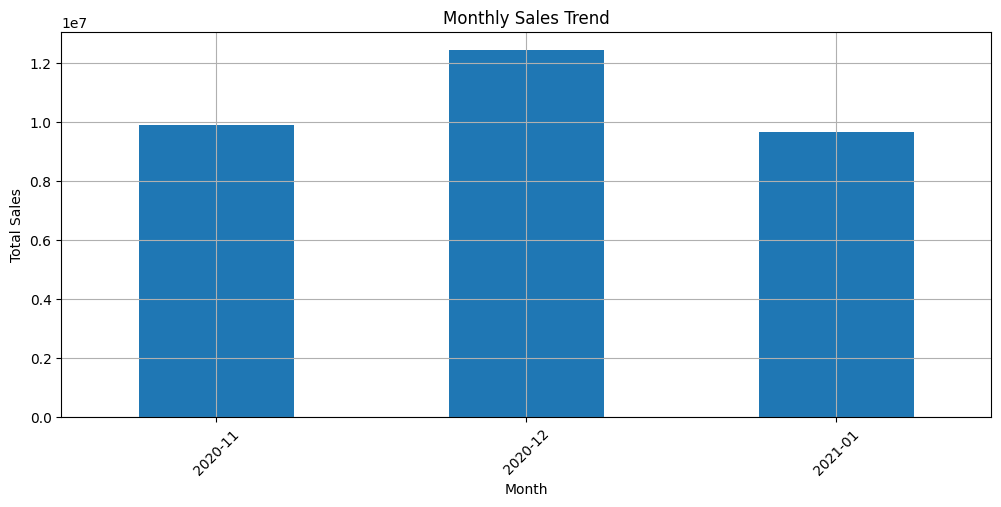

In [35]:
# Створюємо колонку з місяцем
df['order_month'] = df['order_date'].dt.to_period('M')

# Рахуємо продажі по місяцях
monthly_sales = df.groupby('order_month')['price'].sum()

# Будуємо графік
plt.figure(figsize=(12, 5))
monthly_sales.plot(kind='bar')

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Продажі відрізняються між місяцями, що може свідчити про наявність сезонних факторів у поведінці покупців.

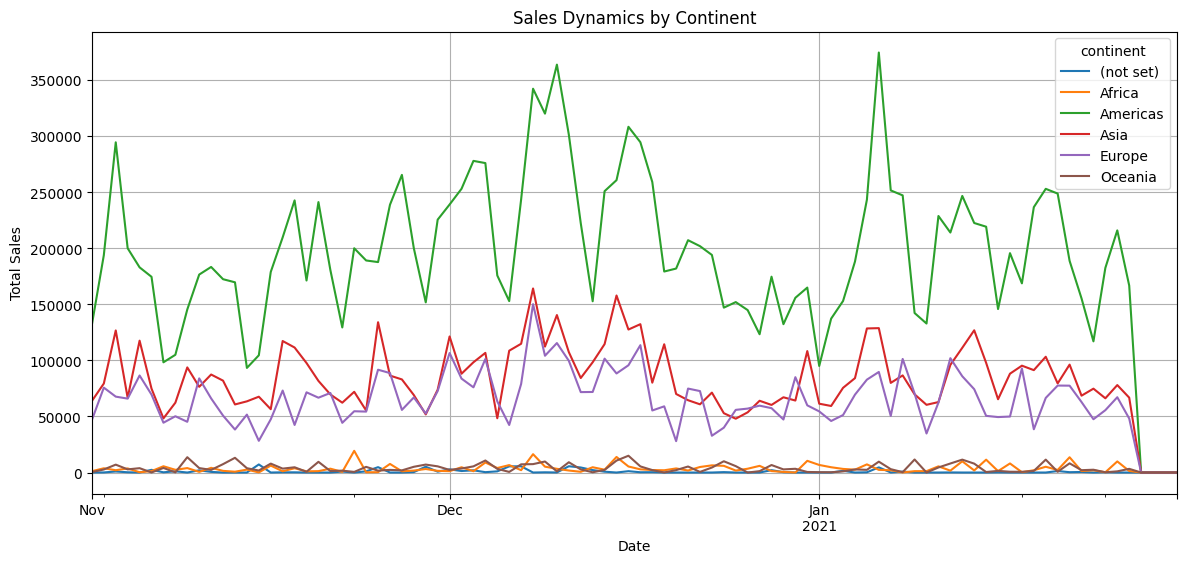

In [36]:
# Групуємо продажі по даті та континенту
sales_by_date_continent = (
    df.groupby(['order_date', 'continent'])['price']
    .sum()
    .unstack()
)

# Будуємо багатолінійний графік
plt.figure(figsize=(14, 6))
sales_by_date_continent.plot(ax=plt.gca())

plt.title('Sales Dynamics by Continent')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


Найбільші коливання продажів спостерігаються на основних континентах. Деякі регіони демонструють стабільніший попит, що важливо враховувати при масштабуванні бізнесу.

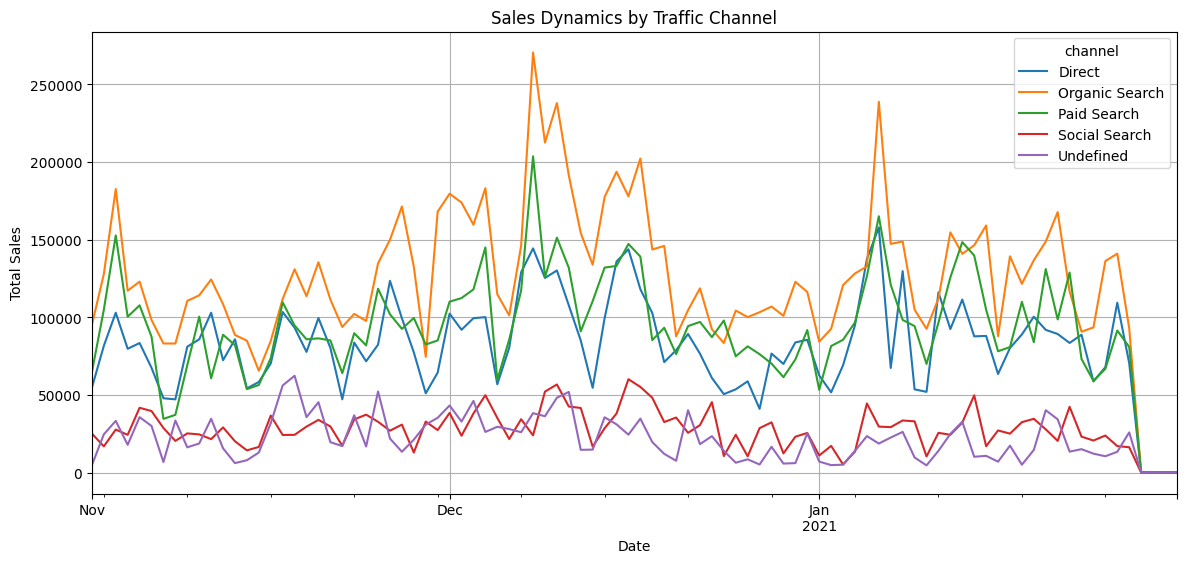

In [37]:
# Групуємо продажі по даті та каналах трафіку
sales_by_date_channel = (
    df.groupby(['order_date', 'channel'])['price']
    .sum()
    .unstack()
)

plt.figure(figsize=(14, 6))
sales_by_date_channel.plot(ax=plt.gca())

plt.title('Sales Dynamics by Traffic Channel')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


Деякі канали трафіку мають більш стабільні продажі, тоді як інші демонструють різкі сплески, що може бути пов’язано з рекламними кампаніями.

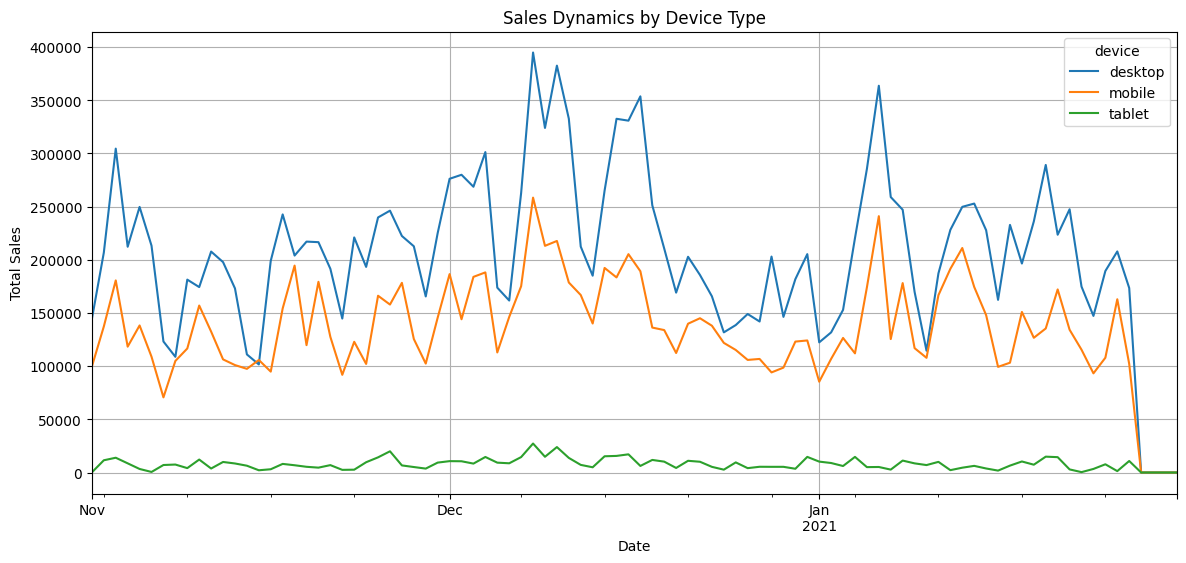

In [38]:
# Групуємо продажі по даті та типу девайса
sales_by_date_device = (
    df.groupby(['order_date', 'device'])['price']
    .sum()
    .unstack()
)

plt.figure(figsize=(14, 6))
sales_by_date_device.plot(ax=plt.gca())

plt.title('Sales Dynamics by Device Type')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


Поведінка користувачів залежить від типу пристрою. Один із девайсів генерує основний обсяг продажів, що важливо враховувати при оптимізації мобільної та десктопної версій сайту.

In [64]:
# Рахуємо кількість унікальних сесій за кожен день
daily_sessions = df.groupby('order_date')['ga_session_id'].nunique()


# Об’єднуємо в одну таблицю
corr_df = pd.concat([daily_sessions, daily_sales], axis=1)
corr_df.columns = ['sessions', 'sales']

corr_df.head()


,sessions,sales
order_date,,
2020-11-01,2576,244292.5
2020-11-02,3599,355506.8
2020-11-03,5173,498979.6
2020-11-04,4184,339187.1
2020-11-05,3743,391276.6


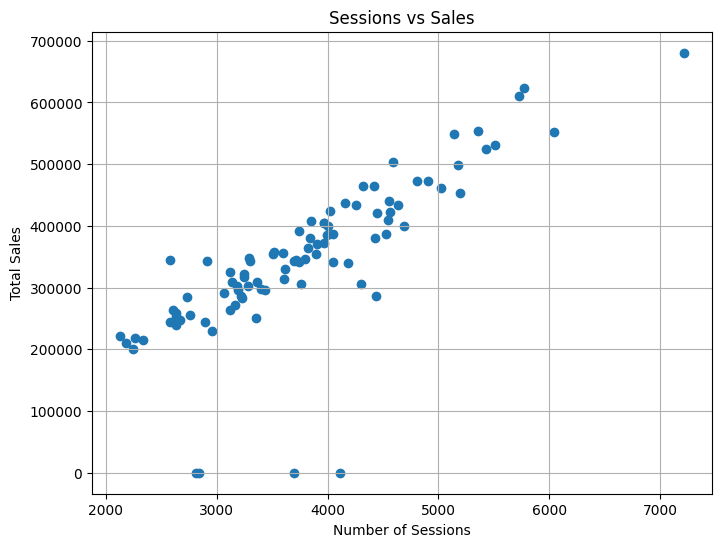

In [40]:
plt.figure(figsize=(8, 6))

plt.scatter(corr_df['sessions'], corr_df['sales'])
plt.title('Sessions vs Sales')
plt.xlabel('Number of Sessions')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


In [41]:
corr_sessions_sales = corr_df.corr().iloc[0, 1]
corr_sessions_sales


np.float64(0.7910809164540896)

Між кількістю сесій та загальними продажами спостерігається позитивний взаємозв’язок. Зі зростанням кількості сесій зазвичай зростає і обсяг продажів.

In [42]:
top3_continents = df.groupby('continent')['price'].sum().sort_values(ascending=False).head(3).index
top3_continents


Index(['Americas', 'Asia', 'Europe'], dtype='object', name='continent')

In [43]:
continent_corr_df = (
    df[df['continent'].isin(top3_continents)]
    .groupby(['order_date', 'continent'])['price']
    .sum()
    .unstack()
)

continent_corr_df.head()


continent,Americas,Asia,Europe
order_date,,,
2020-11-01,132002.5,63823.0,46908.0
2020-11-02,193861.0,79370.0,75710.8
2020-11-03,294529.8,126737.8,67692.0
2020-11-04,200009.5,66602.0,65915.0
2020-11-05,182988.2,117608.4,86540.0


In [44]:
continent_corr_df.corr()


continent,Americas,Asia,Europe
continent,,,
Americas,1.000000,0.792025,0.770586
Asia,0.792025,1.000000,0.768427
Europe,0.770586,0.768427,1.000000


Продажі між основними континентами мають певний рівень кореляції, що може свідчити про загальні глобальні тренди попиту.

In [45]:
channel_corr_df = (
    df.groupby(['order_date', 'channel'])['price']
    .sum()
    .unstack()
)

channel_corr_df.corr()


channel,Direct,Organic Search,Paid Search,Social Search,Undefined
channel,,,,,
Direct,1.000000,0.837833,0.814072,0.604060,0.517505
Organic Search,0.837833,1.000000,0.870086,0.583117,0.526068
Paid Search,0.814072,0.870086,1.000000,0.596428,0.521961
Social Search,0.604060,0.583117,0.596428,1.000000,0.455126
Undefined,0.517505,0.526068,0.521961,0.455126,1.000000


Між деякими каналами трафіку спостерігається кореляція, що може свідчити про перетин однієї й тієї ж аудиторії між різними джерелами трафіку.

In [46]:
top5_categories = df.groupby('category')['price'].sum().sort_values(ascending=False).head(5).index

category_corr_df = (
    df[df['category'].isin(top5_categories)]
    .groupby(['order_date', 'category'])['price']
    .sum()
    .unstack()
)

category_corr_df.corr()


category,Beds,Bookcases & shelving units,Cabinets & cupboards,Chairs,Sofas & armchairs
category,,,,,
Beds,1.000000,0.592913,0.514609,0.554500,0.535378
Bookcases & shelving units,0.592913,1.000000,0.539428,0.637090,0.666194
Cabinets & cupboards,0.514609,0.539428,1.000000,0.572870,0.657563
Chairs,0.554500,0.637090,0.572870,1.000000,0.578248
Sofas & armchairs,0.535378,0.666194,0.657563,0.578248,1.000000


Продажі між основними категоріями товарів можуть бути повʼязані між собою, що може свідчити про наявність крос-попиту або спільних сезонних факторів.

In [47]:
# Продажі у зареєстрованих користувачів
sales_registered = df[df['account_id'].notna()]['price'].dropna()

# Продажі у не зареєстрованих користувачів
sales_unregistered = df[df['account_id'].isna()]['price'].dropna()

sales_registered.shape, sales_unregistered.shape

((2781,), (30757,))

In [48]:
sales_registered.mean(), sales_unregistered.mean()


(np.float64(928.6294498381877), np.float64(955.529232369867))

In [49]:
t_stat, p_value = ttest_ind(sales_registered, sales_unregistered, equal_var=False)

t_stat, p_value


(np.float64(-1.0295858211997013), np.float64(0.30327991470555704))

Результати t-test показали, що між середнім чеком зареєстрованих та незареєстрованих користувачів
НЕМАЄ статистично значущої різниці (p > 0.05).


In [50]:
# Фільтруємо лише Europe та Americas
eu_am_df = df[df['continent'].isin(['Europe', 'Americas'])].copy()

# Створюємо колонку: органіка чи ні
eu_am_df['is_organic'] = eu_am_df['channel'] == 'Organic Search'

# Створюємо зведену таблицю
contingency_table = pd.crosstab(
    eu_am_df['continent'],
    eu_am_df['is_organic']
)

contingency_table

is_organic,False,True
continent,,
Americas,124508,68671
Europe,41940,23195


In [51]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

chi2, p


(np.float64(0.08110059225974814), np.float64(0.7758114260479175))

За результатами chi-square тесту було визначено, що різниця у частці органічного трафіку між Європою та Америкою є не статистично значущою.

In [52]:
# Видаляємо рядки без назви товару або ціни
clean_products = df.dropna(subset=['product_name', 'price'])

# Групуємо по товару та рахуємо загальну виручку
top_products = (
    clean_products
    .groupby('product_name')['price']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Виводимо ТОП-10 товарів
top_products


,price
product_name,
GRÖNLID,2299190.0
LIDHULT,2257508.0
VIMLE,1710015.0
BESTÅ,1100634.5
VALLENTUNA,1014376.0
KIVIK,877763.0
BEKANT,797761.0
HAVSTA,627430.0
SOLLERÖN,604380.0


<Axes: title={'center': 'Top 10 Products by Revenue'}, ylabel='product_name'>

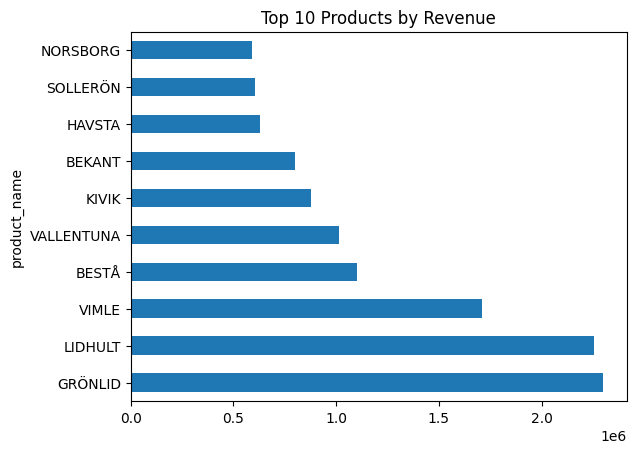

In [53]:
# Будуємо графік ТОП-10 товарів за виручкою
top_products.plot(
    kind='barh',
    title='Top 10 Products by Revenue'
)


In [54]:
# Видаляємо рядки без категорії або ціни
clean_categories = df.dropna(subset=['category', 'price'])

# Рахуємо виручку по кожній категорії
top_categories = (
    clean_categories
    .groupby('category')['price']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

# Виводимо ТОП-5 категорій
top_categories


,price
category,
Sofas & armchairs,8388254.5
Chairs,6147748.8
Beds,4919725.0
Bookcases & shelving units,3640818.1
Cabinets & cupboards,2336499.5


<Axes: title={'center': 'Top 5 Categories by Revenue'}, xlabel='category'>

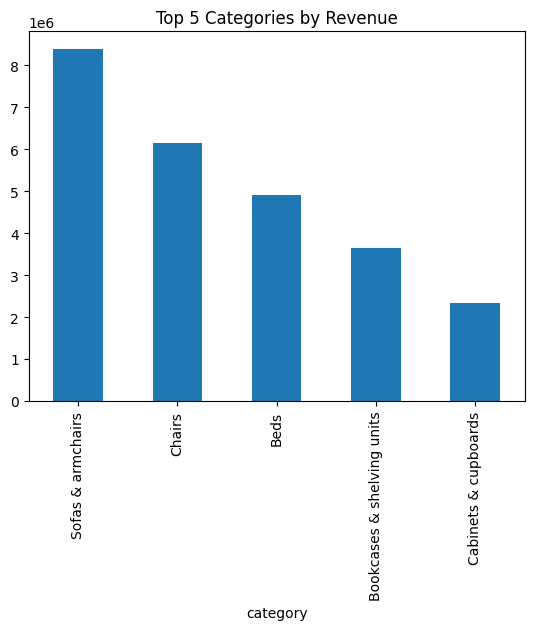

In [55]:
# Будуємо графік ТОП-5 категорій за доходом
top_categories.plot(
    kind='bar',
    title='Top 5 Categories by Revenue'
)


In [56]:
# Загальний середній чек по всім замовленням
aov_total = df['price'].mean()
aov_total


np.float64(953.2986791102632)

In [57]:
# Середній чек по кожному каналу трафіку
aov_by_channel = df.groupby('channel')['price'].mean().sort_values(ascending=False)
aov_by_channel


,price
channel,
Undefined,971.588635
Direct,960.887615
Organic Search,959.076554
Paid Search,941.279518
Social Search,932.292231


In [58]:
# Створюємо колонку: чи органічний трафік
df['is_organic'] = df['channel'] == 'Organic Search'

# Рахуємо загальну виручку для organic та paid
revenue_by_traffic = df.groupby('is_organic')['price'].sum()

revenue_by_traffic


,price
is_organic,
False,20538579.5
True,11433151.6


<Axes: title={'center': 'Revenue: Organic vs Paid Traffic'}, xlabel='is_organic'>

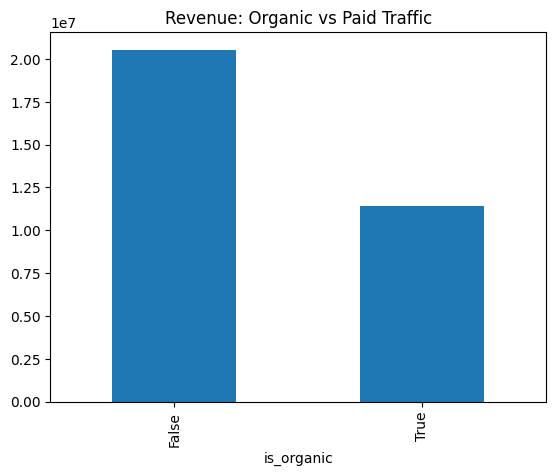

In [59]:
# Візуалізація доходу від органіки та платного трафіку
revenue_by_traffic.plot(
    kind='bar',
    title='Revenue: Organic vs Paid Traffic'
)


In [60]:
# Виділяємо місяць із дати замовлення
df['month'] = df['order_date'].dt.to_period('M')

# Рахуємо місячну виручку
monthly_revenue = df.groupby('month')['price'].sum()

monthly_revenue


,price
month,
2020-11,9897515.0
2020-12,12423439.3
2021-01,9650776.8


<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='month'>

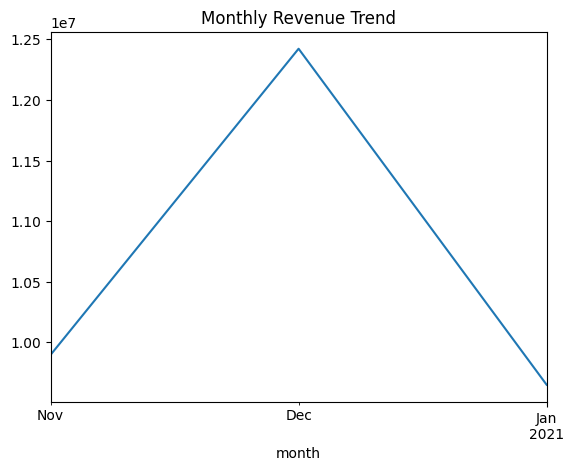

In [61]:
# Візуалізація місячної динаміки доходу
monthly_revenue.plot(
    title='Monthly Revenue Trend'
)


In [65]:
# 🔹 Продажі та кількість замовлень по континентах

# Сума продажів по континентах
sales_by_continent = (
    df.groupby('continent')['price']
    .sum()
    .sort_values(ascending=False)
)

# Кількість замовлень (унікальних сесій) по континентах
orders_by_continent = (
    df.groupby('continent')['ga_session_id']
    .nunique()
    .sort_values(ascending=False)
)

print("Топ-3 континенти за виручкою:")
print(sales_by_continent.head(3))

print("\nТоп-3 континенти за кількістю замовлень (сесій):")
print(orders_by_continent.head(3))


# 🔹 Продажі та кількість замовлень по країнах

sales_by_country = (
    df.groupby('country')['price']
    .sum()
    .sort_values(ascending=False)
)

orders_by_country = (
    df.groupby('country')['ga_session_id']
    .nunique()
    .sort_values(ascending=False)
)

print("\nТоп-5 країн за виручкою:")
print(sales_by_country.head(5))

print("\nТоп-5 країн за кількістю замовлень:")
print(orders_by_country.head(5))


Топ-3 континенти за виручкою:
continent
Americas    17665280.0
Asia         7601298.3
Europe       5934624.2
Name: price, dtype: float64

Топ-3 континенти за кількістю замовлень (сесій):
continent
Americas    193179
Asia         83113
Europe       65135
Name: ga_session_id, dtype: int64

Топ-5 країн за виручкою:
country
United States     13943553.9
India              2809762.0
Canada             2437921.0
United Kingdom      938317.9
France              710692.8
Name: price, dtype: float64

Топ-5 країн за кількістю замовлень:
country
United States     153470
India              32763
Canada             25994
United Kingdom     11003
France              6958
Name: ga_session_id, dtype: int64


ТОП-10 моделей девайсів за виручкою (% від загальних продажів):
mobile_model_name
Chrome        27.835602
<Other>       20.440966
Safari        20.302504
iPhone        20.082667
ChromeBook     5.725241
Edge           2.180746
iPad           1.403910
Firefox        1.316998
Pixel 4 XL     0.369976
Pixel 3        0.341390
Name: price, dtype: float64


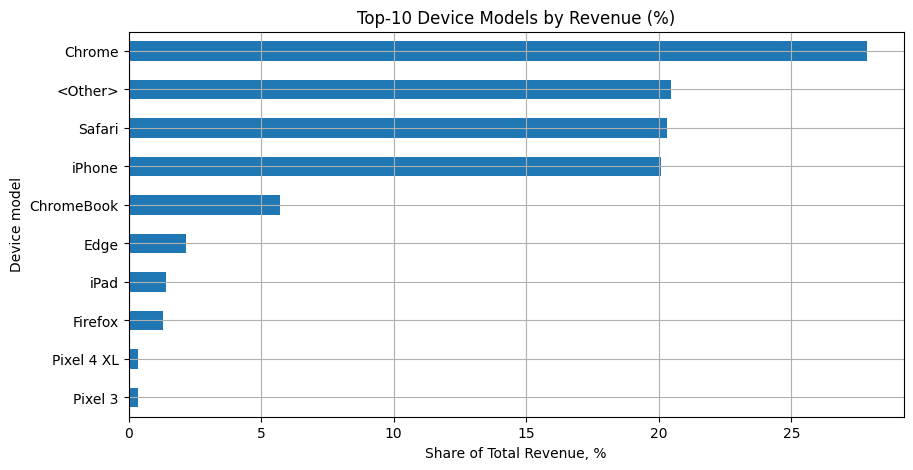

In [66]:
# 🔹 Продажі у розрізі моделей пристроїв (ТОП-10)

sales_by_model = (
    df.groupby('mobile_model_name')['price']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Переводимо в % від загальної виручки
sales_by_model_percent = (sales_by_model / df['price'].sum()) * 100

print("ТОП-10 моделей девайсів за виручкою (% від загальних продажів):")
print(sales_by_model_percent)

# (за бажанням – барчарт)
plt.figure(figsize=(10, 5))
sales_by_model_percent.sort_values().plot(kind='barh')
plt.title('Top-10 Device Models by Revenue (%)')
plt.xlabel('Share of Total Revenue, %')
plt.ylabel('Device model')
plt.grid(True)
plt.show()


In [67]:
# 🔹 Зведена таблиця: кількість сесій по каналах та девайсах

# Прибираємо рядки, де немає каналу або девайса
sessions_clean = df.dropna(subset=['channel', 'device', 'ga_session_id'])

# Створюємо півот-таблицю: рядки – канали, стовпці – девайси
sessions_pivot = (
    sessions_clean
    .groupby(['channel', 'device'])['ga_session_id']
    .nunique()
    .unstack(fill_value=0)
)

sessions_pivot


device,desktop,mobile,tablet
channel,,,
Direct,47825,31745,1812
Organic Search,72622,49014,2789
Paid Search,55167,37034,2140
Social Search,16288,10988,638
Undefined,12527,8486,470


In [68]:
# 🔹 Зведена таблиця: продажі топ-10 категорій у топ-5 країнах

# Топ-10 категорій за виручкою
top10_categories = (
    df.groupby('category')['price']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Топ-5 країн за виручкою
top5_countries = (
    df.groupby('country')['price']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Фільтруємо тільки потрібні країни та категорії
pivot_data = df[
    df['category'].isin(top10_categories) &
    df['country'].isin(top5_countries)
]

# Створюємо зведену таблицю
sales_pivot_cat_country = (
    pivot_data
    .groupby(['category', 'country'])['price']
    .sum()
    .unstack(fill_value=0)
)

sales_pivot_cat_country


country,Canada,France,India,United Kingdom,United States
category,,,,,
Bar furniture,51724.0,11199.0,57657.0,22103.0,330805.0
Beds,354772.0,116414.0,358319.5,133816.0,2213058.0
Bookcases & shelving units,278981.9,73830.0,364507.4,113987.6,1567606.9
Cabinets & cupboards,181802.0,59101.5,191888.0,71684.5,994545.5
Chairs,417740.8,134029.4,544309.2,188519.4,2619773.8
Chests of drawers & drawer units,71952.0,21544.5,73111.0,36784.0,382388.0
Children's furniture,30264.0,14258.0,39177.0,13348.0,207575.0
Outdoor furniture,185322.8,40486.4,162289.4,57002.4,929245.2
Sofas & armchairs,692427.5,187735.0,788430.0,234812.0,3707144.5


In [69]:
# 🔹 Середній чек по каналах і девайсах
aov_pivot = (
    df.dropna(subset=['channel', 'device', 'price'])
    .groupby(['channel', 'device'])['price']
    .mean()
    .unstack(fill_value=0)
)

aov_pivot


device,desktop,mobile,tablet
channel,,,
Direct,960.818346,963.255578,918.725625
Organic Search,969.064014,947.126767,902.622353
Paid Search,946.013648,931.738276,985.695652
Social Search,908.020577,945.265070,1368.659649
Undefined,993.191533,915.219305,1460.202273


In [71]:


# 🔹 Кількість сесій по днях та каналах
daily_sessions_channel = (
    df.groupby(['order_date', 'channel'])['ga_session_id']
    .nunique()
    .unstack(fill_value=0)
)

# Готуємо дані для ANOVA: список серій, по одній на канал
channel_series = [daily_sessions_channel[col] for col in daily_sessions_channel.columns]

f_stat, p_val = f_oneway(*channel_series)

print("F-statistic:", f_stat)
print("p-value:", p_val)


F-statistic: 439.7675316990713
p-value: 8.433830529447116e-155


## 📌 Business Insights

- Найбільша частка виручки надходить з регіону Americas.
- США є найбільшим ринком за доходом.
- Desktop-користувачі приносять більше виручки ніж mobile.
- Частка органічного трафіку між Європою та Америкою не має статистично значущої різниці.
- Зареєстровані та незареєстровані користувачі мають подібний середній чек.
- Продажі мають сезонність з піками наприкінці року.
- Organic та Paid трафік приносять різний загальний дохід.


🔗 **Live Dashboard (Tableau Public):**  
➡️ https://public.tableau.com/app/profile/oleksandr.stopochkin/viz/Portfolio1_17649269477990/SalesPerformanceDashboard?publish=yes